In [1]:
import TwitterData as tw
import pandas as pd

train_index_column_c = "training_raw_tweet_features_timestamp"
timestamp_df = pd.DataFrame()

timestamp_t = tw.get_resource(train_index_column_c)

col_name = "col"
timestamp_df[col_name] = timestamp_t[train_index_column_c]

In [3]:
import math

def getDayPhase(hour):
    night = [22,23,24,0,1,2,3,4,5]
    morining = [6,7,8,9,10,11]
    lunch = [12,13,14]
    afternoon = [15,16,17,18]
    evening = [19,20,21]
    if hour in night:
        return "night"
    elif hour in morining:
        return "morning"
    elif hour in lunch:
        return "lunch"
    elif hour in afternoon:
        return "afternoon"
    elif hour in evening:
        return "evening"
    
def getHoursFromMidnightOfCurrentDay(timestamp):
    fixed_point = timestamp.replace(hour=0,minute=0,second=0)
    difference = timestamp - fixed_point
    return math.floor(difference.seconds/60/60)
    

In [11]:
from datetime import datetime
c = 1

#print(datetime.utcfromtimestamp(timestamp_df["user_id"][c]))
#print(datetime.utcfromtimestamp(timestamp_df["user_id"][c]).hour)
#print(getDayPhase(datetime.utcfromtimestamp(timestamp_df["user_id"][c]).hour))
print(datetime.utcfromtimestamp(timestamp_df[col_name][c]))
print(getHoursFromMidnightOfCurrentDay(datetime.utcfromtimestamp(timestamp_df[col_name][c])))   

2020-02-06 19:55:10
19


0     6136208
1     6112609
2     6237324
3     6607270
4     5488785
5     4903468
6     4694040
7     4368048
8     4807894
9     5238097
10    5584703
11    6071704
12    6744329
13    7225934
14    7495094
15    7751600
16    7052397
17    6857558
18    6482107
19    6443163
20    6627276
21    6383395
22    6557732
23    6204503
Name: col, dtype: int64
CPU times: user 20min 2s, sys: 1min 50s, total: 21min 53s
Wall time: 21min 58s


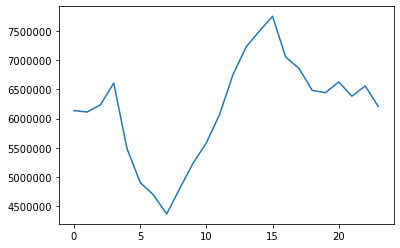

In [17]:
%%time
plot = pd.DataFrame()
plot[col_name] = timestamp_df[col_name].map(lambda x: int(getHoursFromMidnightOfCurrentDay(datetime.utcfromtimestamp(x))))
day_count= plot[col_name].value_counts().sort_index()
print(day_count)
import matplotlib.pyplot as plt

plt.plot(day_count)

Above here there's the distribution of the tweets in terms of hour of the day in which the interaction happened.
Below a more readable bar plot of the same data.

<BarContainer object of 24 artists>

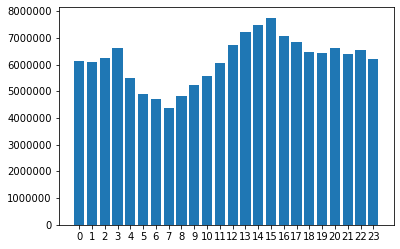

In [35]:
plt.xticks(range(0,24))
plt.bar(x = range(0,24), height = day_count)

Below there are the number of interactions sampled per day of the (training) week.

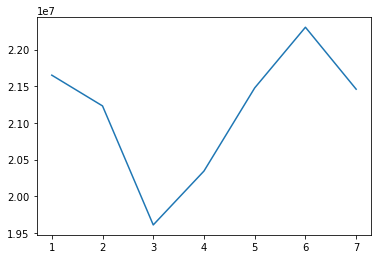

CPU times: user 5min 28s, sys: 22.1 s, total: 5min 50s
Wall time: 5min 51s


In [40]:
%%time
plot2 = pd.DataFrame()
plot2[col_name] = timestamp_df[col_name].map(lambda x: datetime.utcfromtimestamp(x).isoweekday())

day2_count = plot2[col_name].value_counts().sort_index()

plt.plot(day2_count)
plt.show()

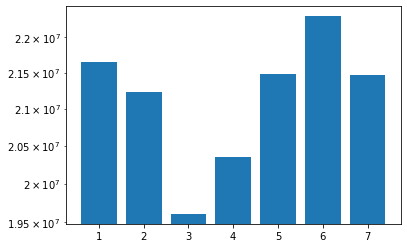

In [44]:
#plt.axis([0, 8, min(day2_count)-1000 , max(day2_count)+1000])
plt.bar(x = range(1,8), height = day2_count)
plt.yscale("log")
plt.show()


The lowest number of interaction is sampled on wednesday (mid week), and the highest is sampled on saturday.